## Exploratory Data Analysis (EDA)

The goal of this step is to thoroughly explore the dataset in order to understand its structure, detect anomalies or missing values and uncover patterns or relationships between variables.

This process includes:
- General info and summary statistics
- Distribution analysis of numerical and categorical features
- Missing values inspection
- Relationship analysis between features and the target variable

### Import & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

### 1. General Info About Data

In [3]:
df.shape

(2235, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [5]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [6]:
df.isnull().sum()

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64

### Dataset Overview Results

- The dataset contains 2235 rows and 13 columns.
- Some columns such as `Cinsiyet`, `KanGrubu`, `KronikHastalik` and `Alerji` contain missing values.
- Both `TedaviSuresi` and `UygulamaSuresi` are stored as text rather than numeric.
- These columns need to be converted into numerical format for proper analysis.

### 2. Data Preparation: Converting Text Columns into Numeric

Both `TedaviSuresi` (e.g., "15 Seans") and `UygulamaSuresi` (e.g., "20 Dakika") are stored as text. For analysis and modeling, I will extract the numeric part and create new columns called `TedaviSuresi_num` and `UygulamaSuresi_num`.

In [7]:
# Convert TedaviSuresi to numeric
df["TedaviSuresi_num"] = df["TedaviSuresi"].str.extract("(\d+)").astype(float)

# Convert UygulamaSuresi to numeric
df["UygulamaSuresi_num"] = df["UygulamaSuresi"].str.extract("(\d+)").astype(float)

# Check the first few rows
df[["TedaviSuresi", "TedaviSuresi_num", "UygulamaSuresi", "UygulamaSuresi_num"]].head()

,TedaviSuresi,TedaviSuresi_num,UygulamaSuresi,UygulamaSuresi_num
0,5 Seans,5.0,20 Dakika,20.0
1,15 Seans,15.0,20 Dakika,20.0
2,15 Seans,15.0,20 Dakika,20.0
3,15 Seans,15.0,5 Dakika,5.0
4,15 Seans,15.0,20 Dakika,20.0


### 3. Summary Statistics

In [8]:
# shows only numerical columns
df.describe()

,HastaNo,Yas,TedaviSuresi_num,UygulamaSuresi_num
count,2235.000000,2235.000000,2235.000000,2235.000000
mean,145333.100224,47.327069,14.570917,16.573154
std,115.214248,15.208634,3.725322,6.268635
min,145134.000000,2.000000,1.000000,3.000000
25%,145235.000000,38.000000,15.000000,10.000000
50%,145331.000000,46.000000,15.000000,20.000000
75%,145432.000000,56.000000,15.000000,20.000000
max,145537.000000,92.000000,37.000000,45.000000


In [9]:
# shows only dtype = object (categorical/text) columns
df.describe(include="object")

,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
count,2066,1560,2235,1624,2224,1291,2160,2235,2235,2014,2235
unique,2,8,5,220,10,38,367,244,23,37,10
top,Kadın,0 Rh+,Türkiye,Myastenia gravis,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Polen,"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",Dorsalji -Boyun+trapez,15 Seans,Bel,20 Dakika
freq,1274,579,2173,38,2045,198,149,231,1670,528,1535


### Summary Statistics Insights

**Numerical Columns**
- `Yas`: The average patient age is around 47 years.
  - Minimum = 2, Maximum = 92.
  - This shows that both children and elderly patients are included, which makes sense in a rehabilitation context.
- `HastaNo`: This is just an anonymized identifier and will not be used in the analysis.
- `TedaviSuresi_num`: Most patients receive around 15 sessions. The maximum observed is 37 sessions.
- `UygulamaSuresi_num`: The average application duration is ~16 minutes, with a maximum of 45 minutes. Most patients have 20 minutes.

**Categorical Columns**
- `Cinsiyet`: Two categories (Male/Female). The majority of patients are Female (1274 records).
- `KanGrubu`: 8 unique values. The most common type is `0 Rh+` (579 patients) and 675 entries are missing.
- `Uyruk`: 5 unique values, but most patients are from Türkiye (2173 records). Non-Turkish patients are very few.
- `KronikHastalik`: 220 unique entries (because multiple conditions are listed together). The most frequent condition is *Myastenia gravis* (38 patients). This column behaves like a multi-label field and will need preprocessing later.
- `Alerji`: 38 unique entries. The most frequent allergy is *Polen* (198 patients).
- `Tanilar`: 367 unique diagnoses. The most frequent is *Dorsalji, Diğer, Lumbosakral Bölge* (149 patients).
- `Bolum`: 10 unique departments. The majority of patients are from *Fiziksel Tıp Ve Rehabilitasyon, Solunum Merkezi* (2045 records).
- `TedaviAdi`: 244 unique treatments. The most common is *Dorsalji – Boyun+trapez* (231 patients).

**Key Observations**
- There are significant missing values in `KanGrubu`, `Alerji` and `KronikHastalik`.
- Numerical transformation already applied: `TedaviSuresi_num` and `UygulamaSuresi_num` can now be used for analysis.
- Some categorical columns (e.g., `Bolum`, `Uyruk`) are highly imbalanced, which we should keep in mind during preprocessing.

### 4. Distributions of Numerical Features

I will start with histograms to explore the distribution of numerical features:
- `Yas`
- `TedaviSuresi_num`
- `UygulamaSuresi_num`

This helps identify the overall shape of the data, detect potential outliers and see whether the variables are normally distributed or skewed.

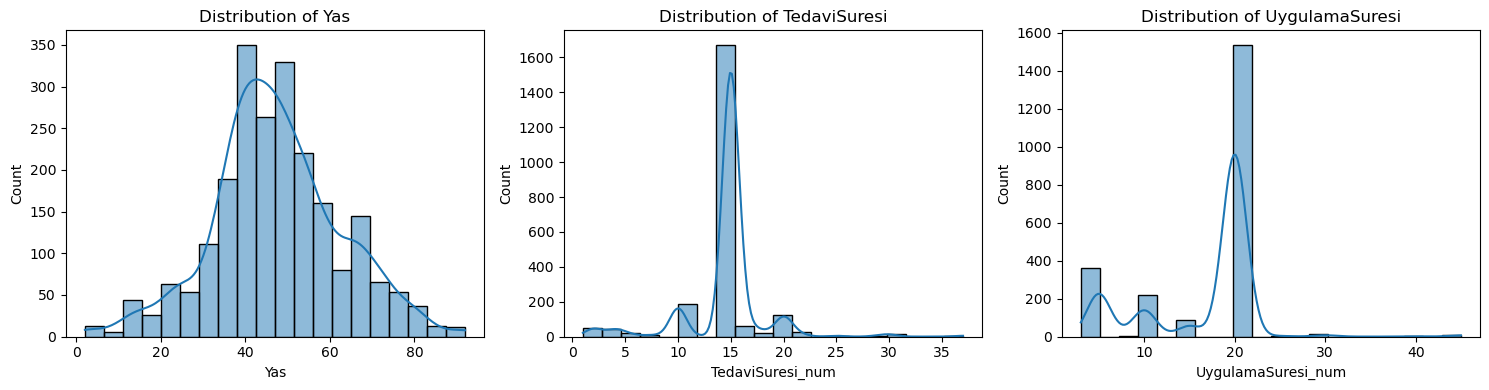

In [10]:
plt.figure(figsize=(15, 4))

# Yas
plt.subplot(1, 3, 1)
sns.histplot(df["Yas"], bins=20, kde=True)
plt.title("Distribution of Yas")

# TedaviSuresi_num
plt.subplot(1, 3, 2)
sns.histplot(df["TedaviSuresi_num"], bins=20, kde=True)
plt.title("Distribution of TedaviSuresi")

# UygulamaSuresi_num
plt.subplot(1, 3, 3)
sns.histplot(df["UygulamaSuresi_num"], bins=20, kde=True)
plt.title("Distribution of UygulamaSuresi")

plt.tight_layout()
plt.show()

### Insights from Numerical Distributions

- `Yas`: The distribution is close to normal, with most patients between 35–55 years old. A few children (under 10) and elderly patients (80+) are also included.
- `TedaviSuresi_num`: The majority of patients receive around 15 sessions. Only a small number of patients exceed 30 sessions, which may be considered outliers.
- `UygulamaSuresi_num`: Most applications last 20 minutes, with smaller groups at 5, 10 and 15 minutes. A few outliers exist above 30 minutes.


### 5. Distributions of Categorical Features

I will inspect the frequency distributions of key categorical features (`Cinsiyet`, `KanGrubu`, `Bolum`). This helps understand class imbalance and potential encoding needs later.

Cinsiyet missing: 169
KanGrubu missing: 675
Bolum missing: 11


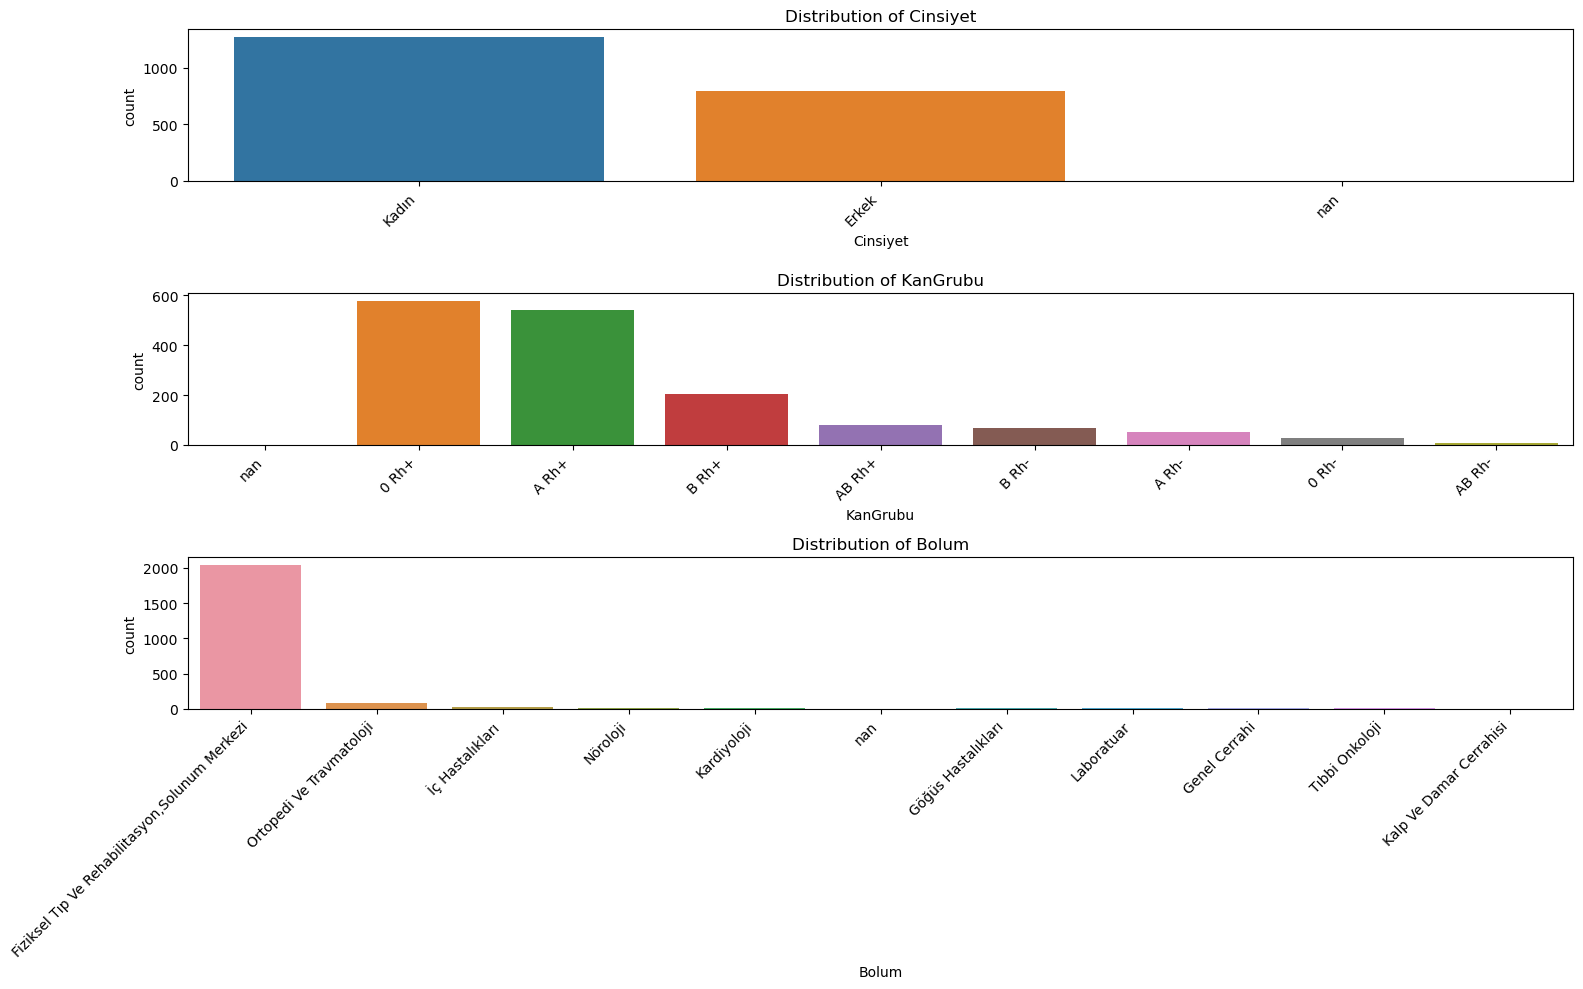

In [11]:
cat_cols = ["Cinsiyet", "KanGrubu", "Bolum"]

plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 1, i)
    order = df[col].value_counts(dropna=False).head(15).index  # sorting first 15 categories
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha="right")
    print(f"{col} missing:", df[col].isna().sum())
plt.tight_layout()
plt.show()

### Insights from Categorical Distributions

- `Cinsiyet`: The dataset has more female patients than male. A few records have missing values.
- `KanGrubu`: The most frequent blood types are `0 Rh+` and `A Rh+`. There are many missing values (NaN), and some groups (e.g., `AB Rh-`) are very rare.
- `Bolum`: The majority of patients belong to `Fiziksel Tıp Ve Rehabilitasyon, Solunum Merkezi`. Other departments have very few records, which indicates a strong class imbalance.

### 6. Missing Values

This section examines the missing values in the dataset.  

In [12]:
df.isnull().sum()

HastaNo                 0
Yas                     0
Cinsiyet              169
KanGrubu              675
Uyruk                   0
KronikHastalik        611
Bolum                  11
Alerji                944
Tanilar                75
TedaviAdi               0
TedaviSuresi            0
UygulamaYerleri       221
UygulamaSuresi          0
TedaviSuresi_num        0
UygulamaSuresi_num      0
dtype: int64

Some columns such as `Alerji`, `KanGrubu`, and `KronikHastalik` have a high number of missing entries, while others like `Bolum` and `Tanilar` have only a few. Visualizing missingness helps decide which imputation strategies are needed later in preprocessing.

### Missing Values Heatmap

- This heatmap shows the distribution of missing values across the dataset.
- Columns like `KanGrubu`, `Alerji` and `KronikHastalik` are expected to have a high concentration of NaN values.
- This visualization helps decide where imputation strategies will be needed.

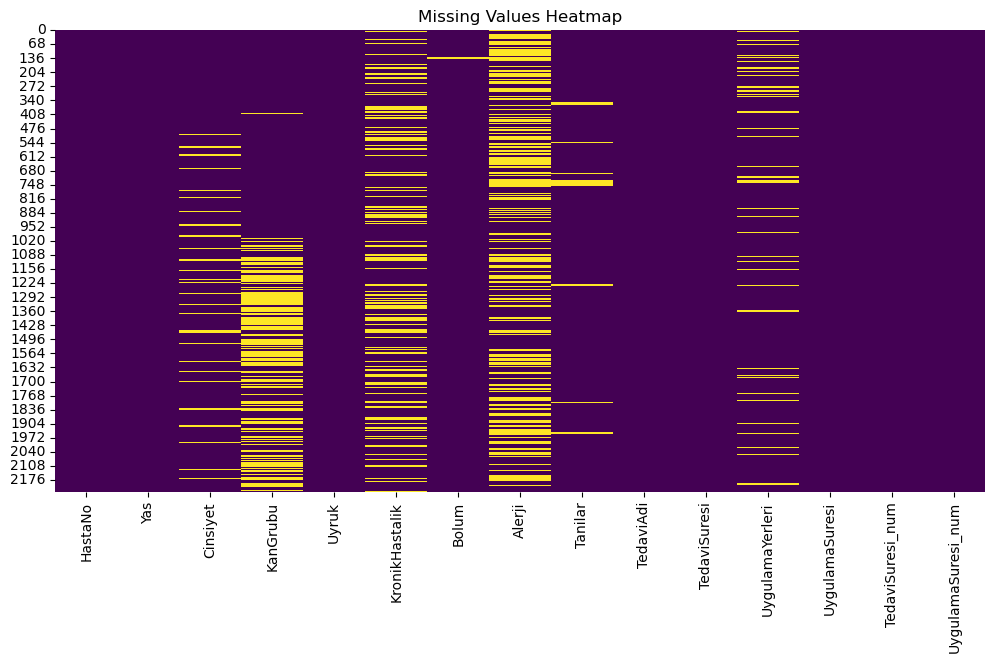

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### 7. Relationships with Target (TedaviSuresi_num)

I will analyze how the target variable `TedaviSuresi_num`
varies across different categories:

- `Bolum` → average treatment duration per department
- `Cinsiyet` → treatment duration distribution per gender
- `Yas` → relationship between patient age and treatment duration

This helps identify whether some groups require longer treatments and whether categorical variables are potential predictors.

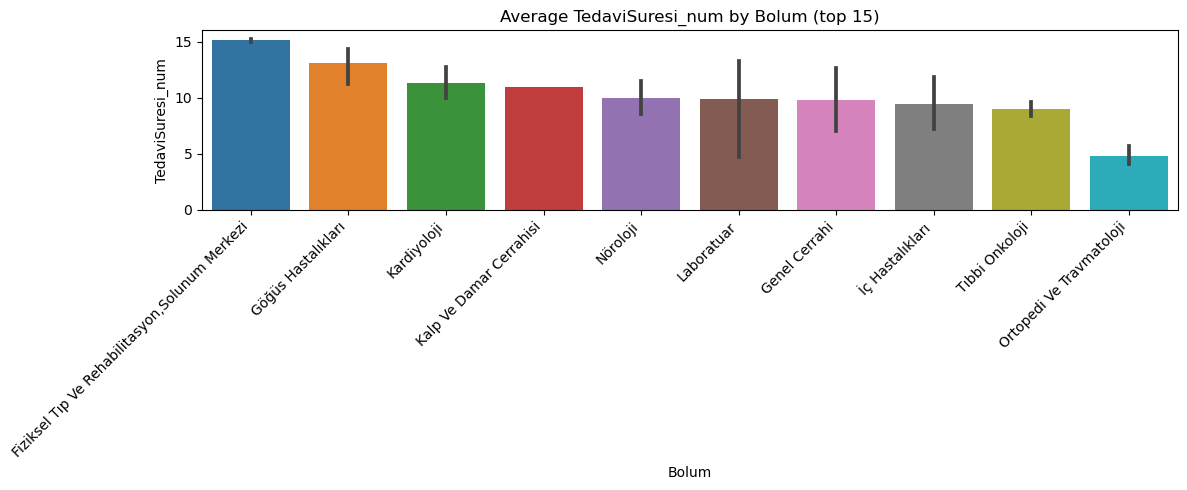

In [14]:
# Bolum vs TedaviSuresi_num

plt.figure(figsize=(12, 5))
order = (df.groupby("Bolum")["TedaviSuresi_num"]
           .mean()
           .sort_values(ascending=False)
           .head(15).index)

sns.barplot(data=df, x="Bolum", y="TedaviSuresi_num",
            order=order, estimator="mean")
plt.title("Average TedaviSuresi_num by Bolum (top 15)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Insights: TedaviSuresi_num by Bolum

- The longest average treatment duration is observed in `Fiziksel Tıp Ve Rehabilitasyon, Solunum Merkezi` (~15 sessions).
- Other departments such as `Göğüs Hastalıkları` and `Kardiyoloji` show moderate durations (around 11–13 sessions).
- `Ortopedi ve Travmatoloji` has the lowest average (~5 sessions).
- This suggests that treatment requirements differ significantly by department.
- However, some departments have very few records, so averages should be interpreted with caution.

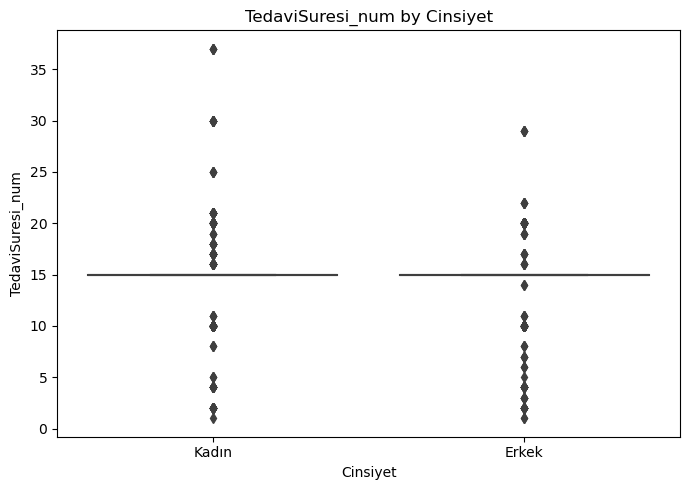

In [15]:
# Cinsiyet vs TedaviSuresi_num

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Cinsiyet", y="TedaviSuresi_num")
plt.title("TedaviSuresi_num by Cinsiyet")
plt.tight_layout()
plt.show()

### Insights: TedaviSuresi_num by Cinsiyet

- Both groups (Kadın and Erkek) have almost the same median treatment duration (~15 sessions).
- There is no significant difference in treatment duration between genders.
- Outliers exist in both groups: some patients receive very short treatments (1–5 sessions), while others receive extended treatments (30+ sessions).  

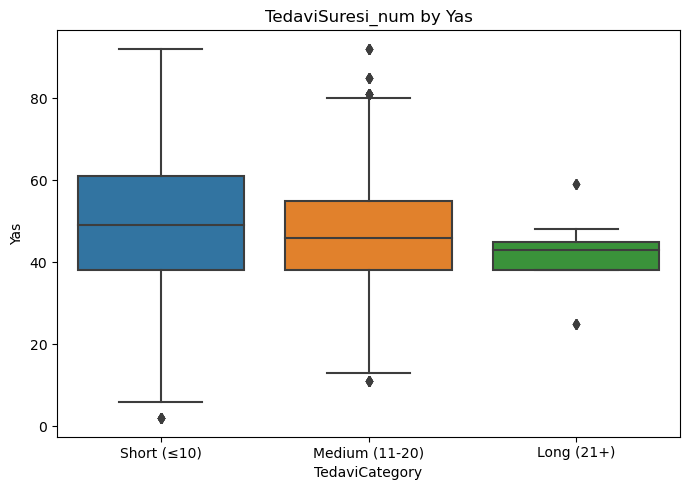

In [16]:
# Yas vs TedaviSuresi_num
df["TedaviCategory"] = pd.cut(df["TedaviSuresi_num"],
                              bins=[0,10,20,40],
                              labels=["Short (≤10)", "Medium (11-20)", "Long (21+)"])

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="TedaviCategory", y="Yas")
plt.title("TedaviSuresi_num by Yas")
plt.tight_layout()
plt.show()

### Insights: Yas vs TedaviSuresi_num

- Patients with shorter treatments (≤10 sessions) include a wide age range, from children to elderly.
- Medium duration (11–20 sessions) also spans many ages, but with fewer extremes.
- Long treatments (21+ sessions) are more concentrated around middle-aged patients (~40–50).

### 8. EDA Summary

The exploratory data analysis revealed the following key insights:

**General Structure**
- The dataset contains 2235 rows and 13 columns.
- Most columns are categorical (`Cinsiyet`, `KanGrubu`, `Bolum`, etc.), while a few are numerical (`Yas`, `TedaviSuresi_num`, `UygulamaSuresi_num`).

**Missing Values**
- High missingness in `Alerji` (944), `KanGrubu` (675), and `KronikHastalik` (611).
- Moderate missingness in `Cinsiyet` (169) and `UygulamaYerleri` (221).
- Minimal missingness in `Bolum` and `Tanilar`.
- No missing values in `Yas`, `TedaviAdi`, `TedaviSuresi_num` and `UygulamaSuresi_num`.

**Distributions**
- `Yas`: Normally distributed with an average age of 47 years. Patients range from 2 to 92 years old.
- `TedaviSuresi_num`: Most patients receive ~15 sessions. Outliers exist above 30 sessions.
- `UygulamaSuresi_num`: Most treatments last 20 minutes, with some outliers above 30 minutes.

**Categorical Features**
- `Cinsiyet`: Majority Female (1274 vs 792 Male).  
- `KanGrubu`: `0 Rh+` and `A Rh+` are the most common. Some very rare types exist (e.g., `AB Rh-`).
- `Bolum`: Overwhelmingly dominated by `Fiziksel Tıp Ve Rehabilitasyon, Solunum Merkezi` (>2000 records). Other departments are highly underrepresented.

**Target Relationships**
- `Cinsiyet`: No major difference in treatment duration between genders.
- `Bolum`: Departments differ in treatment durations. `Fiziksel Tıp Ve Rehabilitasyon` has the longest average (~15 sessions), while `Ortopedi ve Travmatoloji` has the shortest (~5).
- `Yas`: Long treatments (21+ sessions) are more common among middle-aged patients (~40–50).

**Key Takeaways**
- The dataset is **imbalanced** in `Bolum` and `Uyruk`.
- Several categorical features contain missing values, which will require imputation.
- Some text columns (`KronikHastalik`, `Alerji`, `Tanilar`) behave like **multi-label features** and will need special preprocessing.
- Outliers exist in both treatment duration and application duration.

These findings guide the next step: **Data Pre-Processing**, where missing values, categorical encodings and imbalanced categories will be addressed.


## Data Pre-Processing

Based on the findings from the EDA, the goal of this step is to clean and preprocess the data to make it model-ready.  
This process includes:

- Handling missing values
- Encoding categorical variables
- Normalizing or standardizing numerical features
- Addressing any data quality issues (e.g., duplicates, inconsistent formatting)

### 1. Duplicate Check

- Checked for duplicate rows in the dataset.
- If any duplicates are found, they are dropped to prevent bias in further analysis.

In [17]:
# 1. Full row duplicates
dup_count = df.duplicated().sum()
print("Full row duplicates:", dup_count)

if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)

# 2. Check if same patient ID appears multiple times
dup_hasta = df.duplicated(subset=["HastaNo"]).sum()
print("Duplicate patient IDs (HastaNo):", dup_hasta)

Full row duplicates: 928
Duplicates removed. New shape: (1307, 16)
Duplicate patient IDs (HastaNo): 903


### Results of Duplicate Check

- Found **928 full-row duplicates** → removed them.
- Dataset reduced from 2235 rows to 1307 rows.
- Found **903 duplicate patient IDs (HastaNo)**.
  - This likely means the same patient received multiple treatments.
  - These are kept in the dataset because they represent valid cases.

### 2. Missing Values Handling

Goals:
- Standardize text fields (trim spaces, fix common typos).
- Engineer simple numeric counts from multi-label text columns.
- Impute numerical features with median (robust to outliers).
- Impute categorical features with "Unknown" (or mode if preferred).

Columns:
- Numerical: `Yas`, `TedaviSuresi_num`, `UygulamaSuresi_num`
- Categorical: `Cinsiyet`, `KanGrubu`, `Uyruk`, `Bolum`, `TedaviAdi`
- Multi-label text: `KronikHastalik`, `Alerji`, `Tanilar`, `UygulamaYerleri`

### Standardize Text & Quick Fixes

In [18]:
# strip leading/trailing spaces for common object cols
for col in ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "TedaviAdi",
            "TedaviSuresi", "UygulamaYerleri", "UygulamaSuresi"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# common typo in blood groups: "0 Rh+" -> "O Rh+"
df["KanGrubu"] = df["KanGrubu"].replace(
    {r"^0(\s*Rh[+-])$": r"O\1"}, regex=True
)

### Converting Multi-labels to Simple Count Features

In [19]:
def multi_count(val):
    if pd.isna(val) or str(val).strip()=="":
        return 0
    return sum(1 for t in str(val).split(",") if t.strip()!="")

df["KronikHastalik_num"]   = df["KronikHastalik"].apply(multi_count)
df["Alerji_num"]           = df["Alerji"].apply(multi_count)
df["Tanilar_num"]          = df["Tanilar"].apply(multi_count)
df["UygulamaYerleri_num"]  = df["UygulamaYerleri"].apply(multi_count)

### Impute Mumerical Features (median)

In [20]:
for c in ["Yas", "TedaviSuresi_num", "UygulamaSuresi_num", "KronikHastalik_num", "Alerji_num", "Tanilar_num", "UygulamaYerleri_num"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

num_cols = ["Yas", "TedaviSuresi_num", "UygulamaSuresi_num", "KronikHastalik_num", "Alerji_num", "Tanilar_num", "UygulamaYerleri_num"]

df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))

### Impute Categorical Features (“Unknown”)

In [21]:
cat_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "TedaviAdi"]
for c in cat_cols:
    df[c] = df[c].replace({np.nan: "Unknown"})

### Final Check for Remaining Missing Values

In [22]:
missing_after = df.isnull().sum().sort_values(ascending=False)
print(missing_after.head(10))

Alerji                540
KronikHastalik        345
Tanilar                46
HastaNo                 0
UygulamaSuresi          0
Tanilar_num             0
Alerji_num              0
KronikHastalik_num      0
TedaviCategory          0
UygulamaSuresi_num      0
dtype: int64


**Note on Multi-label Columns**

- Original columns `Alerji`, `KronikHastalik` and `Tanilar` remain in the dataset as text features.
- However, for modeling, their numeric count versions (`Alerji_num`, `KronikHastalik_num`, `Tanilar_num`) will be used instead.
- This ensures that no missing values remain in the numeric versions, while still keeping the original text data for reference.

### 3. Categorical Encoding

Categorical variables cannot be directly used in machine learning models, so they need to be converted into numeric format.

I will use **OneHotEncoding** to transform the following categorical features:
- `Cinsiyet`
- `KanGrubu`
- `Uyruk`
- `Bolum`
- `TedaviAdi`

This encoding will create binary columns for each category, ensuring the model can interpret these features correctly.

In [23]:
# Select categorical columns
cat_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "TedaviAdi"]

# One-hot encoding with pandas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)
df_encoded.head()

Original shape: (1307, 20)
Encoded shape: (1307, 281)


,HastaNo,Yas,KronikHastalik,Alerji,Tanilar,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,TedaviSuresi_num,UygulamaSuresi_num,...,TedaviAdi_Çapraz bağ lezyonu,TedaviAdi_Ön çapraz bağ rehabilitasyonu,TedaviAdi_ÖÇB,TedaviAdi_İV Disk Boyun,TedaviAdi_İV DİSK BOZUKLUĞU-BEL,TedaviAdi_İV DİSK BOZUKLUĞU-BEL-1,TedaviAdi_İV DİSK BOZUKLUĞU-BEL-2,TedaviAdi_İmpimgement send,TedaviAdi_İmpingement Sağ,TedaviAdi_İmpingement op izometrik
0,145134,60,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,5 Seans,Ayak Bileği,20 Dakika,5.0,20.0,...,False,False,False,False,False,False,False,False,False,False
1,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",15 Seans,Boyun,20 Dakika,15.0,20.0,...,False,False,False,False,False,False,False,False,False,False
2,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",15 Seans,"Boyun,Sırt",20 Dakika,15.0,20.0,...,False,False,False,False,False,False,False,False,False,False
3,145135,28,"Duchenne Musküler Distrofisi, Myastenia gravis...",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",15 Seans,Boyun,5 Dakika,15.0,5.0,...,False,False,False,False,False,False,False,False,False,False
4,145136,60,NaN,"POLEN,NOVALGIN",Parapleji ve tetrapleji,10 Seans,nan,30 Dakika,10.0,30.0,...,False,False,False,False,False,False,False,False,False,False


### 4. Scaling Numerical Features

To ensure that all numeric features are on a comparable scale, I applied **StandardScaler** from scikit-learn. 

Scaled features:
- `Yas`
- `UygulamaSuresi_num`
- `KronikHastalik_num`
- `Alerji_num`
- `Tanilar_num`
- `UygulamaYerleri_num`

The target variable `TedaviSuresi_num` was excluded from scaling.
Scaling prevents features with larger ranges (e.g., age) from dominating smaller-range features.

In [24]:
# Select numeric columns (excluding target)
num_cols = ["Yas", "UygulamaSuresi_num", "KronikHastalik_num", "Alerji_num", "Tanilar_num", "UygulamaYerleri_num"]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,Yas,UygulamaSuresi_num,KronikHastalik_num,Alerji_num,Tanilar_num,UygulamaYerleri_num
0,0.824254,0.781556,0.755076,0.388504,-0.863668,-0.205584
1,-1.251219,0.781556,1.426883,-1.049950,0.856211,-0.205584
2,-1.251219,0.781556,1.426883,-1.049950,0.856211,4.864193
3,-1.251219,-1.287921,1.426883,-1.049950,0.856211,-0.205584
4,0.824254,2.161208,-1.260345,1.826958,-0.863668,-0.205584


- After scaling, the selected numeric features (`Yas`, `UygulamaSuresi_num`, `KronikHastalik_num`, `Alerji_num`, `Tanilar_num`, `UygulamaYerleri_num`) are transformed to a standardized range (mean=0, std=1).  
- The values no longer reflect the original units but relative positions (z-scores).

In [25]:
# Control. Expcect mean≈0, std≈1
df[num_cols].agg(["mean", "std"]).round(3)

,Yas,UygulamaSuresi_num,KronikHastalik_num,Alerji_num,Tanilar_num,UygulamaYerleri_num
mean,-0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


- As expected, the means of all scaled numeric columns are approximately 0 and the standard deviations are approximately 1.  
- This confirms that the `StandardScaler` worked correctly and the data is ready for modeling.

### Pipeline

To make the preprocessing workflow more modular and reusable, I created a pipeline using `ColumnTransformer` and `Pipeline` from scikit-learn.

This ensures that:
- All preprocessing steps (imputation, encoding, scaling) are applied consistently.
- No data leakage occurs (the pipeline fits only on the training data).
- The code remains clean and easily extendable for different models.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Numeric & categorical features
num_cols = ["Yas", "UygulamaSuresi_num", "KronikHastalik_sayi", "Alerji_sayi", "Tanilar_sayi", "UygulamaYerleri_sayi"]

cat_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "TedaviAdi"]

# Pipelines for numeric & categorical
numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols)
    ]
)

# Final pipeline with a simple model (Linear Regression just as placeholder)
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Example: fit pipeline on train/test split
# pipeline.fit(X_train, y_train)
# print("Pipeline training completed.")

### Export Model-Ready Dataset

In [26]:
output_path = "model_ready_dataset.xlsx"
df.to_excel(output_path, index=False)

print(f"Model-ready dataset saved as {output_path}")

Model-ready dataset saved as model_ready_dataset.xlsx
